In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/flipkart-product-review-dataset/flipkart_product.csv


In [2]:
df=pd.read_csv("/kaggle/input/flipkart-product-review-dataset/flipkart_product.csv",encoding="unicode_escape")

In [3]:
df.head()

,ProductName,Price,Rate,Review,Summary
0,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Super!,Great cooler.. excellent air flow and for this...
1,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Awesome,Best budget 2 fit cooler. Nice cooling
2,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,The quality is good but the power of air is de...
3,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",1,Useless product,Very bad product it's a only a fan
4,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,Ok ok product


In [4]:
df = df.drop(['ProductName','Price','Review'], axis = 1)

In [5]:
# Checking for the Missing values
# Using isnull fuction to count the total null values in each field
total = df.isnull().sum().sort_values(ascending=False) 
# Percent of missing values is estimated by dividing total missing and the original total
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
# Concatenating the Total and Percent fields sing pandas concat fucntion
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
# Displays top 20 from our max sorted list
missing_data.head()

,Total,Percent
Summary,14,0.000074
Rate,1,0.000005


In [6]:
df = df.dropna(subset=['Summary'])

In [7]:
df = df.dropna(subset=['Rate'])

In [8]:
# Checking for the Missing values
# Using isnull fuction to count the total null values in each field
total = df.isnull().sum().sort_values(ascending=False) 
# Percent of missing values is estimated by dividing total missing and the original total
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
# Concatenating the Total and Percent fields sing pandas concat fucntion
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
# Displays top 20 from our max sorted list
missing_data.head()

,Total,Percent
Rate,0,0.0
Summary,0,0.0


In [9]:
df.head()

,Rate,Summary
0,5,Great cooler.. excellent air flow and for this...
1,5,Best budget 2 fit cooler. Nice cooling
2,3,The quality is good but the power of air is de...
3,1,Very bad product it's a only a fan
4,3,Ok ok product


In [10]:
train = df

In [11]:
train1=train[train['Rate']=='1']
train2=train[train['Rate']=='2']
train3=train[train['Rate']=='3']
train4=train[train['Rate']=='4']
train5=train[train['Rate']=='5']

In [12]:
train1.shape, train2.shape, train3.shape, train4.shape, train5.shape

((19607, 2), (6234, 2), (15680, 2), (39649, 2), (108686, 2))

In [13]:
train1=train1[:int(train1.shape[0]/100)]
train2=train2[:int(train2.shape[0]/100)]
train3=train3[:int(train3.shape[0]/100)]
train4=train4[:int(train4.shape[0]/100)]
train5=train5[:int(train5.shape[0]/100)]

In [14]:
train1.shape, train2.shape, train3.shape, train4.shape, train5.shape

((196, 2), (62, 2), (156, 2), (396, 2), (1086, 2))

In [15]:
train=pd.concat([train1,train2,train3,train4,train5],axis=0)

In [16]:
train.shape

(1896, 2)

In [17]:
train.columns

Index(['Rate', 'Summary'], dtype='object')

In [18]:
train.head()

,Rate,Summary
3,1,Very bad product it's a only a fan
8,1,Very bad cooler
48,1,Small wire and moter capacity is very low fan ...
59,1,The product doesn't cool as rated by other cus...
67,1,Cooler not provide cool air... Because 1year e...


In [19]:
df = train

# Remove punctuations

In [20]:
import string
def rmv_punc(text):
  punct = string.punctuation
  return text.translate(str.maketrans('', '', punct))

In [21]:
df['Summary'] = df['Summary'].apply(lambda x: rmv_punc(x))

# remove character with undefined name

In [22]:
import re
def rmv_char(text):
  text = re.sub('[^a-zA-Z0-9(/)]',' ', text)
  text = re.sub('\s+',' ', text) #remove whitespace
  return text

In [23]:
df['Summary'] = df['Summary'].apply(lambda x: rmv_char(x).lower())

In [24]:
df['Rate'].unique()

array(['1', '2', '3', '4', '5'], dtype=object)

In [25]:
num = ['5', '3', '1', '4', '2'] 
    
# selecting rows based on condition 
df[~df['Rate'].isin(num)]

,Rate,Summary


In [26]:
df.drop(df[~df['Rate'].isin(num)].index, inplace = True)
df['Rate'].unique()

array(['1', '2', '3', '4', '5'], dtype=object)

# Word Cloud

In [27]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns #visualize
from textblob import TextBlob
import nltk
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
import re
import wordcloud
from PIL import Image
from wordcloud import WordCloud 

In [28]:
ignored_words = set(stopwords.words("english"))
ignored_words.add("bad")
ignored_words.add("good")
ignored_words.add("flipkart")
ignored_words.add("also")
ignored_words.add("like")
ignored_words.add("item")
ignored_words.add("one")
ignored_words.add("much")
ignored_words.add("even")
ignored_words.add("product")

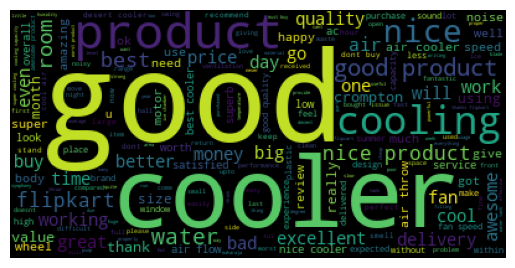

In [29]:
text3 = ' '.join(df['Summary'])
wordcloud2 = WordCloud().generate(text3)
# Generate plot
plt.imshow(wordcloud2)
plt.axis("off")
plt.savefig('WordCloud.pdf', format='pdf', bbox_inches='tight')
plt.show()

## ENCODER CODE

In [30]:
import torch
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer, AutoModel
from torch.utils.data import TensorDataset, DataLoader
from datasets import Dataset
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from transformers import TrainingArguments
import numpy as np
!pip install evaluate
import evaluate
from transformers import TrainingArguments, Trainer
#Loading libraries


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 4.8 MB/s eta 0:00:00


In [31]:
df.head()

,Rate,Summary
3,1,very bad product its a only a fan
8,1,very bad cooler
48,1,small wire and moter capacity is very low fan ...
59,1,the product doesnt cool as rated by other cust...
67,1,cooler not provide cool air because 1year expe...


In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot')

from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

df = df.rename(columns={'Summary': 'text', 'Rate': 'label'})

# Split the dataset into train and validation sets
train, validation = train_test_split(df, test_size=0.2, random_state=42)

In [33]:
df["label"].unique()

array(['1', '2', '3', '4', '5'], dtype=object)

In [34]:
class_df = df.groupby('label').count()['text'].reset_index().sort_values(by='text',ascending=False)
class_df.style.background_gradient(cmap='winter')

,label,text
4,5,1086
3,4,396
0,1,196
2,3,156
1,2,62


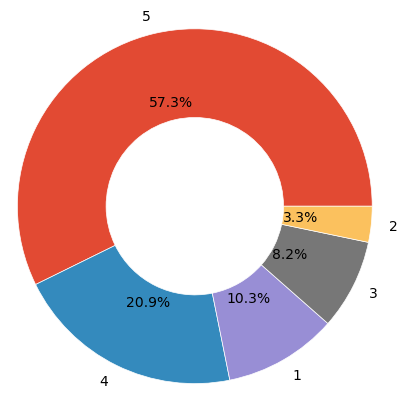

In [35]:
percent_class=class_df.text
labels= class_df.label

my_pie,_,_ = plt.pie(percent_class,radius = 1.2,labels=labels,autopct="%.1f%%")

plt.setp(my_pie, width=0.6, edgecolor='white') 
plt.savefig('Label Distribution.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [36]:
train_dataset = Dataset.from_pandas(train)
test_dataset = Dataset.from_pandas(validation)

# BERT

In [37]:
import pandas as pd
import csv
import re 
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [38]:
!wget --quiet https://raw.githubusercontent.com/tensorflow/models/master/official/nlp/bert/tokenization.py

In [39]:
!pip install tokenization

In [40]:
import tokenization
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.utils import to_categorical
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [41]:
df.head()

,label,text
3,1,very bad product its a only a fan
8,1,very bad cooler
48,1,small wire and moter capacity is very low fan ...
59,1,the product doesnt cool as rated by other cust...
67,1,cooler not provide cool air because 1year expe...


In [42]:
from sklearn.model_selection import train_test_split

# splitting the training and testing part from the data
X_temp, X_test, y_temp, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=0)

In [43]:
train_X = X_temp
train_y = y_temp
test_x = X_test
test_y = y_test

train_X.shape, train_y.shape, test_x.shape , test_y.shape

((1516,), (1516,), (380,), (380,))

In [44]:
label = preprocessing.LabelEncoder()
y = label.fit_transform(train_X)
y = to_categorical(train_y)
print(train_y[:5])

262     1
1613    4
215     4
871     4
750     5
Name: label, dtype: object


In [45]:
m_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2'
bert_layer = hub.KerasLayer(m_url, trainable=True)

### ENcoding Text

In [46]:
!pip install tensorflow==2.0
import tensorflow as tf
print(tf.__version__)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.3/86.3 MB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 325.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 449.9/449.9 kB 4.4 MB/s eta 0:00:00
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=767608460c1022dca61305fca8fdda210d9807d4f1e65a519d70a3de2974767d
  Stored in directory: /root/.cache/pip/wheels/cf/87/6f/3f34218ef184368cec9ee65bdfd65baf117811f0a0ce1263ff
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.11.0
    Uninstalling tensorflow-estimator-2.11.0:
      Successfully uninstalled tensorflow-estimator-2.11.0
  Attempting uninstall: gast
    Found existing installation: gast

In [47]:
import nltk
nltk.download("popular")
from nltk.tokenize import word_tokenize

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk

In [48]:
!pip install bert-for-tf2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Created wheel for bert-for-tf2: filename=bert_for_tf2-0.14.9-py3-none-any.whl size=30534 sha256=76b51cd4ca67e79c01d53823a442ae04ec371e487b66bce8ebbd01e24bbada9f
  Stored in directory: /root/.cache/pip/wheels/d3/b3/5f/1ba04fd4e099213b9c9a3f5b1ac5548fa2e599cb8fc9a868cc
  Created wheel for params-flow: filename=params_flow-0.8.2-py3-none-any.whl size=19472 sha256=3de56fd0f9775da7128c9f8379c5b14c40172b5ece51341537dc50cbcc13a7bf
  Stored in directory: /root/.cache/pip/wheels/91/17/7a/d8dc86bae260c349990d0c36b60685b2c4cd601866d083d471
  Created wheel for py-params: filename=py_params-0.10.2-py3-none-any.whl size=7911 sha256=b73718705d38a8daac670c672feeb28bcc22a3908c6b584d05e7f916798c52f4
  Stored in directory: /root/.cache/pip/wheels/c4/94/74/551bca501c76c25b5f8512e8dc531f9a24dd

In [49]:
from bert import tokenization
from bert.tokenization.bert_tokenization import FullTokenizer

In [50]:
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = FullTokenizer(vocab_file, do_lower_case)

def bert_encode(texts, tokenizer, max_len=512):
    all_tokens = []
    all_masks = []
    all_segments = []
    
    for text in texts:
        text = tokenizer.tokenize(text)
        
        text = text[:max_len-2]
        input_sequence = ["[CLS]"] + text + ["[SEP]"]
        pad_len = max_len-len(input_sequence)
        
        tokens = tokenizer.convert_tokens_to_ids(input_sequence) + [0] * pad_len
        pad_masks = [1] * len(input_sequence) + [0] * pad_len
        segment_ids = [0] * max_len
        
        all_tokens.append(tokens)
        all_masks.append(pad_masks)
        all_segments.append(segment_ids)
        
    return np.array(all_tokens), np.array(all_masks), np.array(all_segments)

### Build the Model

In [51]:
def build_model(bert_layer, max_len=512):
    input_word_ids = tf.keras.Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")
    input_mask = tf.keras.Input(shape=(max_len,), dtype=tf.int32, name="input_mask")
    segment_ids = tf.keras.Input(shape=(max_len,), dtype=tf.int32, name="segment_ids")
    
    pooled_output, sequence_output = bert_layer([input_word_ids, input_mask, segment_ids])
    
    clf_output = sequence_output[:, 0, :]
    
    lay = tf.keras.layers.Dense(64, activation='relu')(clf_output)
    lay = tf.keras.layers.Dropout(0.2)(lay)
    lay = tf.keras.layers.Dense(32, activation='relu')(lay)
    lay = tf.keras.layers.Dropout(0.2)(lay)
    out = tf.keras.layers.Dense(5, activation='softmax')(lay)
    
    model = tf.keras.models.Model(inputs=[input_word_ids, input_mask, segment_ids], outputs=out)
    model.compile(tf.keras.optimizers.Adam(lr=2e-5), loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [52]:
max_len = 250
train_input = bert_encode(train_X.values, tokenizer, max_len=max_len)
test_input = bert_encode(test_x.values, tokenizer, max_len=max_len)
train_labels = train_y

In [53]:
labels = label.classes_
print(labels)

[' heavy noise front fins quality is worst road side cooler front fin quality is much better than this cooler not wort it '
 ' very nice product '
 '1 the fan speed was too good 2 cooling is very nice and in summer too it had given immense cooling effect355 litres capacity so half day sufficient for usagein summerin winter more hours it will run with that water4 there is valve at bottom so we can drain out the water and can keep it aside in non usage period like winter5 shape was too good go for it blindly'
 ...
 'yes its quite goodyou can go for it nicely deliveredthank you flipkart'
 'you can also buy without any hesitation ' 'yup satisfied ']


In [54]:
model = build_model(bert_layer, max_len=max_len)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_word_ids (InputLayer)    [(None, 250)]        0           []                               
                                                                                                  
 input_mask (InputLayer)        [(None, 250)]        0           []                               
                                                                                                  
 segment_ids (InputLayer)       [(None, 250)]        0           []                               
                                                                                                  
 keras_layer (KerasLayer)       [(None, 768),        109482241   ['input_word_ids[0][0]',         
                                 (None, 250, 768)]                'input_mask[0][0]',         

In [55]:
label = preprocessing.LabelEncoder()
y = label.fit_transform(train_labels)
y = to_categorical(y)
print(y[:5])

[[1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


In [56]:
checkpoint = tf.keras.callbacks.ModelCheckpoint('model.h5', monitor='val_accuracy', save_best_only=True, verbose=1)
earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, verbose=1)

train_sh = model.fit(
    train_input, y,
    validation_split=0.2,
    epochs=3,
    callbacks=[checkpoint, earlystopping],
    batch_size=32,
    verbose=1
)

Epoch 1/3
38/38 [==============================] - ETA: 0s - loss: 1.3292 - accuracy: 0.5322 
Epoch 1: val_accuracy improved from -inf to 0.55592, saving model to model.h5
38/38 [==============================] - 1496s 39s/step - loss: 1.3292 - accuracy: 0.5322 - val_loss: 1.2475 - val_accuracy: 0.5559
Epoch 2/3
38/38 [==============================] - ETA: 0s - loss: 1.2645 - accuracy: 0.5594 
Epoch 2: val_accuracy did not improve from 0.55592
38/38 [==============================] - 1484s 39s/step - loss: 1.2645 - accuracy: 0.5594 - val_loss: 1.2504 - val_accuracy: 0.5559
Epoch 3/3
38/38 [==============================] - ETA: 0s - loss: 1.2405 - accuracy: 0.5743 
Epoch 3: val_accuracy did not improve from 0.55592
38/38 [==============================] - 1497s 40s/step - loss: 1.2405 - accuracy: 0.5743 - val_loss: 1.2490 - val_accuracy: 0.5559


## Evaluating the Bert Model

In [57]:
prediction = model.predict(test_input)

12/12 [==============================] - 146s 12s/step


In [58]:
prediction

array([[0.08764995, 0.03387451, 0.1103043 , 0.2361243 , 0.53204685],
       [0.08764995, 0.03387451, 0.11030432, 0.23612429, 0.53204685],
       [0.08764995, 0.03387451, 0.1103043 , 0.23612428, 0.53204685],
       ...,
       [0.08764996, 0.03387451, 0.11030433, 0.23612432, 0.5320469 ],
       [0.08764996, 0.0338745 , 0.11030432, 0.23612434, 0.5320469 ],
       [0.08764998, 0.03387452, 0.11030433, 0.23612429, 0.53204685]],
      dtype=float32)

In [59]:
prediction.shape

(380, 5)

In [60]:
pred = np.argmax(prediction, axis = 1)

In [61]:
pred.shape

(380,)

In [62]:
pred

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

In [63]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y, pred)

0.0